In [2]:
# Importar libreria
import geopandas as gpd

## Carga de archivos

### geopandas.read_file()

In [3]:
ruta_shapefile = 'data/geologia_area.shp' # Indicar ruta del archivo

geologia_shp = gpd.read_file(ruta_shapefile) # Leyendo el archivo

In [4]:
# Comprobando el tipo de la información creada
type(geologia_shp)

geopandas.geodataframe.GeoDataFrame

In [5]:
geologia_shp.head()

,Nombre_Uni,SHAPE_Leng,SHAPE_Area,geometry
0,Tonalitas Coliumo,17054.575034,9.786633e+05,"POLYGON ((682142.897 5956247.079, 682188.162 5..."
1,Formación Quiriquina,457.262330,8.149300e+03,"POLYGON ((665590.814 5927635.114, 665594.624 5..."
2,Tonalitas Coliumo,169239.769602,3.867799e+08,"POLYGON ((675025.968 5921289.368, 673412.998 5..."
3,Tonalitas Coliumo,169239.769602,3.867799e+08,"POLYGON ((677600.777 5921289.368, 675043.627 5..."
4,Tonalitas Coliumo,169239.769602,3.867799e+08,"POLYGON ((679201.092 5921289.368, 678457.241 5..."


### Acceder atributos

#### Sistema de referencia: geodataframe.crs

In [6]:
geologia_shp.crs

<Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 78°W to 72°W - by country
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Tipo de geometria: geodataframe.geom_type

In [7]:
geologia_shp.geom_type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
142    Polygon
143    Polygon
144    Polygon
145    Polygon
146    Polygon
Length: 147, dtype: object

#### Limites: geodataframe.total_bounds

In [8]:
geologia_shp.total_bounds

array([ 657690.9197998, 5921289.3684   ,  686260.7535   , 5956813.982    ])

#### Area: geodataframe.area

In [9]:
geologia_shp.area

0      9.243204e+05
1      8.149300e+03
2      7.509575e+05
3      2.973870e+06
4      1.230947e+06
           ...     
142    4.009458e+05
143    2.716139e+05
144    1.154135e+06
145    8.852233e+02
146    2.132327e+03
Length: 147, dtype: float64

### Ploteo rápido

#### geodataframe.plot()

<AxesSubplot:>

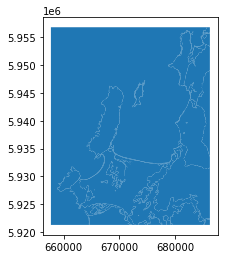

In [10]:
ruta_shapefile = 'data/geologia_area.shp' # Ruta del archivo
geologia_shp = gpd.read_file(ruta_shapefile) # Carga del archivo

geologia_shp.plot() # Ploteo

<AxesSubplot:>

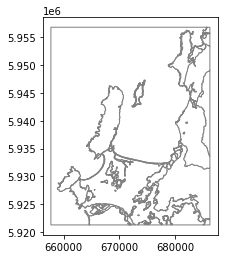

In [11]:
geologia_shp.plot(edgecolor='grey', color='white')

#### Ploteo multiples capas

[]

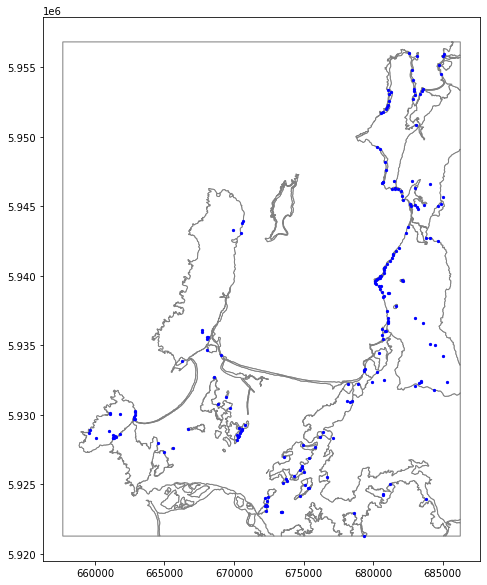

In [14]:
# Leyendo puntos a plotear sobre mapa
puntos_campo = gpd.read_file('data/P_GPS_C2_shp.shp') # Carga de puntos

base = geologia_shp.plot(color='white', edgecolor='grey', figsize=(10,10)) # Mapa base
puntos = puntos_campo.plot(ax=base, color='blue', markersize=5) # Agregar puntos al mapa

base.plot()

## Reproyectar sistemas de referencia

### geopandas.to_crs()

In [15]:
geologia_shp = gpd.read_file('data/geologia_area.shp')

print(f"Sistema de referencia original: {geologia_shp.crs}") # Sistema original

Sistema de referencia original: epsg:32718


In [16]:
shape_latlon = geologia_shp.to_crs("EPSG:4326") # Reproyección

print(f"Sistema de referencia reproyectado: {shape_latlon.crs}") # Sistema posterior a la proyección

Sistema de referencia reproyectado: EPSG:4326


In [17]:
shape_latlon.head()

,Nombre_Uni,SHAPE_Leng,SHAPE_Area,geometry
0,Tonalitas Coliumo,17054.575034,9.786633e+05,"POLYGON ((-72.96569 -36.52182, -72.96519 -36.5..."
1,Formación Quiriquina,457.262330,8.149300e+03,"POLYGON ((-73.14429 -36.78263, -73.14425 -36.7..."
2,Tonalitas Coliumo,169239.769602,3.867799e+08,"POLYGON ((-73.03715 -36.83810, -73.05523 -36.8..."
3,Tonalitas Coliumo,169239.769602,3.867799e+08,"POLYGON ((-73.00829 -36.83762, -73.03695 -36.8..."
4,Tonalitas Coliumo,169239.769602,3.867799e+08,"POLYGON ((-72.99035 -36.83732, -72.99869 -36.8..."


## Geoprocesamiento

### geodataframe.clip()

[]

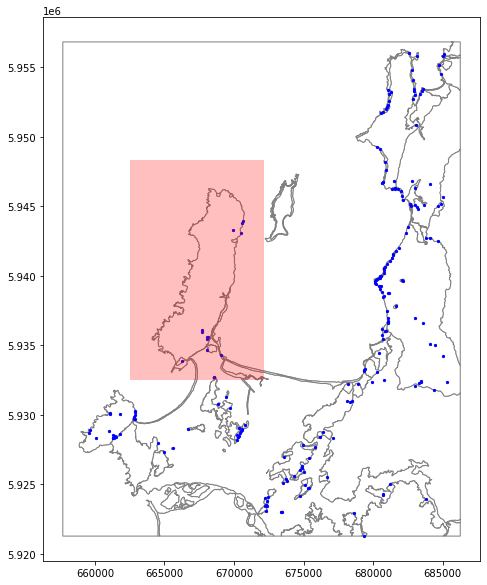

In [18]:
# Cargando geometrias
geologia_shp = gpd.read_file("data/geologia_area.shp") # Poligonos de geologia
puntos_campo = gpd.read_file('data/P_GPS_C2_shp.shp') # Puntos
area_clip = gpd.read_file('data/area_clip.shp') # Area de recorte

# Ploteo preliminar
base = geologia_shp.plot(color='white', edgecolor='grey', figsize=(10,10)) # Mapa base
puntos = puntos_campo.plot(ax=base, color='blue', markersize=5) # Puntos
clip_plot = area_clip.plot(ax=base, color='red', alpha=0.25)

base.plot()

gpd.clip(gdf, mask)

<AxesSubplot:>

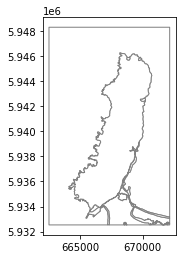

In [19]:
clip_geologia = gpd.clip(geologia_shp, area_clip) # Recorte

# Ploteo para comprobar
clip_geologia.plot(color='white', edgecolor='grey')

### dissolve()

In [20]:
clip_geologia

,Nombre_Uni,SHAPE_Leng,SHAPE_Area,geometry
14,Océano,169239.769602,3.867799e+08,"POLYGON ((672166.793 5933153.988, 672154.748 5..."
29,Formación Cosmito,169239.769602,3.867799e+08,"POLYGON ((668397.014 5935059.294, 668401.882 5..."
30,Formación Quiriquina,169239.769602,3.867799e+08,"POLYGON ((669088.085 5934301.049, 669092.847 5..."
34,Depósitos Fluviales y Aluviales,169239.769602,3.867799e+08,"MULTIPOLYGON (((668482.025 5936206.811, 668504..."
49,Depósitos Litorales,169239.769602,3.867799e+08,"POLYGON ((669590.501 5938543.000, 669612.751 5..."
50,Formación Quiriquina,49734.857418,3.702422e+07,"POLYGON ((666514.674 5933935.617, 666476.156 5..."
70,Formación Cosmito,169239.769602,3.867799e+08,"POLYGON ((668569.675 5932530.586, 668570.206 5..."
71,Serie Occidental,169239.769602,3.867799e+08,"POLYGON ((668786.749 5945918.000, 668781.409 5..."
72,Plutón Hualpén,169239.769602,3.867799e+08,"POLYGON ((670185.800 5942654.781, 670198.002 5..."
73,Plutón Hualpén,169239.769602,3.867799e+08,"POLYGON ((669920.182 5945747.503, 669910.124 5..."


In [21]:
geologia_dissolved = clip_geologia.dissolve(by='Nombre_Uni')
geologia_dissolved

,geometry,SHAPE_Leng,SHAPE_Area
Nombre_Uni,,,
Depósitos Fluviales y Aluviales,"MULTIPOLYGON (((672018.990 5932530.586, 672018...",169239.769602,3.867799e+08
Depósitos Litorales,"MULTIPOLYGON (((667204.670 5932530.586, 667205...",169239.769602,3.867799e+08
Formación Cosmito,"MULTIPOLYGON (((668569.675 5932530.586, 668570...",169239.769602,3.867799e+08
Formación Quiriquina,"MULTIPOLYGON (((668718.881 5932530.586, 668708...",169239.769602,3.867799e+08
Océano,"POLYGON ((672166.793 5933153.988, 672154.748 5...",169239.769602,3.867799e+08
Plutón Hualpén,"MULTIPOLYGON (((670185.800 5942654.781, 670198...",169239.769602,3.867799e+08
Río,"POLYGON ((669361.715 5933976.191, 669359.841 5...",169239.769602,3.867799e+08
Serie Occidental,"POLYGON ((668786.749 5945918.000, 668781.409 5...",169239.769602,3.867799e+08


## Exportar archivos:

### geopandas.GeoDataFrame.to_file()

In [22]:
clip_geologia.to_file("output/geologia_clip.geojson", driver='GeoJSON')
clip_geologia.to_file("output/geologia_clip.shp", driver='ESRI Shapefile')